### 1. Association Rule Generation from Transaction Data

 My assigned number is 9 based on the last 4 digits of my Banner ID: 9309

In [1]:
# Upload CSV file from laptop

from google.colab import files
uploaded = files.upload()

# Get the uploaded filename
filename = list(uploaded.keys())[0]


# Load the CSV using pandas

import pandas as pd

df = pd.read_csv(filename)
print("Preview of your dataset:")
display(df.head())


# Extract UNIQUE grocery items from ALL columns

unique_items = (
    df.astype(str)          # make all values string
      .stack()              # combine all columns into a single column
      .str.strip()          # clean spaces
      .replace("nan", pd.NA)
      .dropna()             # remove empty values
      .unique()             # get unique items
)

print("\nTotal unique items:", len(unique_items))
print("\nAll unique items:")
for item in unique_items:
    print(item)

Saving Grocery_Items_9.csv to Grocery_Items_9.csv
Preview of your dataset:


,0,1,2,3,4,5,6,7,8,9,10
0,abrasive cleaner,yogurt,frozen meals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,fruit/vegetable juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chocolate,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chewing gum,frozen vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bottled beer,other vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Total unique items: 166

All unique items:
abrasive cleaner
yogurt
frozen meals
whole milk
fruit/vegetable juice
chocolate
rolls/buns
chewing gum
frozen vegetables
bottled beer
other vegetables
margarine
onions
brown bread
domestic eggs
beef
bottled water
canned vegetables
hamburger meat
white bread
coffee
ketchup
specialty chocolate
chicken
cereals
beverages
female sanitary products
pot plants
sausage
long life bakery product
tidbits
tropical fruit
root vegetables
pet care
newspapers
dog food
fish
soda
organic sausage
herbs
grapes
curd cheese
napkins
soft cheese
pastry
whipped/sour cream
oil
curd
waffles
butter milk
pork
specialty bar
citrus fruit
cream cheese
butter
red/blush wine
pip fruit
shopping bags
hard cheese
spread cheese
baking powder
dessert
canned beer
frankfurter
pickled vegetables
liquor (appetizer)
hygiene articles
mustard
soups
processed cheese
rum
sliced cheese
salty snack
semi-finished bread
liquor
ice cream
misc. beverages
roll products
flower (seeds)
dish cleaner


There 166 unique items in this Grocery_Items_9 Dataset

In [2]:
print("Number of records in the dataset:", len(df))

Number of records in the dataset: 8000


There 8000 records in this Grocery_Items_9 Dataset

In [3]:
# Convert all item entries to strings and stack everything into one column
all_items = (
    df.astype(str)
      .stack()
      .str.strip()
      .replace("nan", pd.NA)
      .dropna()
)

# Count frequency of each item
item_counts = all_items.value_counts()

# Most popular item
most_popular_item = item_counts.idxmax()
most_popular_count = item_counts.max()

print("Most popular item:", most_popular_item)
print("Total occurrences of this item:", most_popular_count)


# How many **transactions (rows)** contain this item?

# Check row by row whether the item exists anywhere in the row
transactions_with_item = df.apply(
    lambda row: most_popular_item in row.values, axis=1
).sum()

print("Number of transactions containing this item:", transactions_with_item)

Most popular item: whole milk
Total occurrences of this item: 1341
Number of transactions containing this item: 1279


Whole milk is the most popular item.
It appears 1341 times in the dataset and is included in 1279 transactions.

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

!pip install mlxtend

import warnings
warnings.filterwarnings('ignore')

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


clean_df = df.applymap(lambda x: str(x).strip() if pd.notna(x) else "")
transactions = [
    [item for item in row if item not in ["", "nan"]]
    for row in clean_df.values.tolist()
]

# One-hot encode
te = TransactionEncoder()
onehot = te.fit(transactions).transform(transactions)
onehot_df = pd.DataFrame(onehot, columns=te.columns_)

# Frequent itemsets (support >= 0.01)
frequent_itemsets = apriori(onehot_df, min_support=0.01, use_colnames=True)

# Association rules (confidence >= 0.08)
rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.08
).sort_values("confidence", ascending=False)

# Filter only rules with antecedent size 1 or 2

rules_1item = rules[rules['antecedents'].apply(lambda x: len(x) == 1)].reset_index(drop=True)
rules_2item = rules[rules['antecedents'].apply(lambda x: len(x) == 2)].reset_index(drop=True)


rules = rules.reset_index(drop=True)


print("=== Association Rules (support>=0.01, confidence>=0.08) ===")
display(rules_1item[['antecedents','consequents','support','confidence','lift']])

if len(rules_2item) > 0:
    print("\n=== 2-item antecedent rules found ===")
    display(rules_2item[['antecedents','consequents','support','confidence','lift']])
else:
    print("\n=== No 2-item antecedent rules meet the thresholds ===")


=== Association Rules (support>=0.01, confidence>=0.08) ===


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,antecedents,consequents,support,confidence,lift
0,(yogurt),(whole milk),0.011500,0.134111,0.838848
1,(other vegetables),(whole milk),0.016000,0.130746,0.817799
2,(soda),(whole milk),0.012750,0.126551,0.791561
3,(rolls/buns),(whole milk),0.013500,0.123853,0.774688
4,(soda),(other vegetables),0.011000,0.109181,0.892185
5,(whole milk),(other vegetables),0.016000,0.100078,0.817799
6,(rolls/buns),(other vegetables),0.010375,0.095183,0.777802
7,(other vegetables),(soda),0.011000,0.089888,0.892185
8,(other vegetables),(rolls/buns),0.010375,0.084780,0.777802
9,(whole milk),(rolls/buns),0.013500,0.084441,0.774688



=== No 2-item antecedent rules meet the thresholds ===


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Using minimum support = 0.01 and minimum confidence = 0.08, the dataset produced 10 association rules. All of them have single-item antecedents. No 2-item antecedent rules met the required thresholds.

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,0.001,0.005,0.010
0.050,532,67,12
0.075,309,46,11
0.100,157,24,6


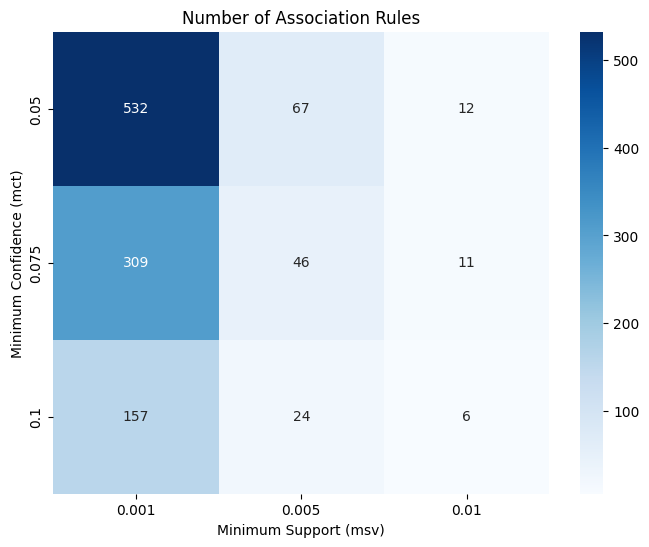

In [5]:
# Silence warnings only once
import warnings
warnings.filterwarnings("ignore")

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import seaborn as sns
import matplotlib.pyplot as plt


# Prepare transactions
clean_df = df.applymap(lambda x: str(x).strip() if pd.notna(x) else "")
transactions = [
    [item for item in row if item not in ["", "nan"]]
    for row in clean_df.values.tolist()
]

# One-hot encode once
te = TransactionEncoder()
onehot = te.fit(transactions).transform(transactions)
onehot_df = pd.DataFrame(onehot, columns=te.columns_)


# Thresholds
msv_values = [0.001, 0.005, 0.01]
mct_values = [0.05, 0.075, 0.10]

results = pd.DataFrame(index=mct_values, columns=msv_values)


# Rule counts
for mct in mct_values:
    for msv in msv_values:
        freq = apriori(onehot_df, min_support=msv, use_colnames=True)
        rules = association_rules(freq, metric="confidence", min_threshold=mct)
        results.loc[mct, msv] = len(rules)

display(results)


# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(results.astype(int), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Minimum Support (msv)")
plt.ylabel("Minimum Confidence (mct)")
plt.title("Number of Association Rules")
plt.show()


When support and confidence values are low, we get many association rules. As we increase these thresholds, the number of rules drops quickly. The heatmap clearly shows this, darker areas mean more rules, and lighter areas mean fewer rules.

### 2. Image Classification using CNN

In [6]:
from google.colab import files
uploaded = files.upload()


import zipfile, os

# Unzip everything into folder "data"
for fn in uploaded.keys():
    with zipfile.ZipFile(fn, 'r') as zip_ref:
        zip_ref.extractall("data")

# Show full folder structure
print("=== Folder Structure ===")
for root, dirs, files in os.walk("data"):
    print(root, "->", dirs, "FILES:", files[:5])


Saving New_Dataset_CNN.zip to New_Dataset_CNN.zip
=== Folder Structure ===
data -> ['New_Dataset'] FILES: []
data/New_Dataset -> ['sea', 'forest', 'buildings', 'glacier'] FILES: []
data/New_Dataset/sea -> [] FILES: ['912.jpg', '11746.jpg', '641.jpg', '585.jpg', '834.jpg']
data/New_Dataset/forest -> [] FILES: ['502.jpg', '2889.jpg', '3300.jpg', '701.jpg', '1416.jpg']
data/New_Dataset/buildings -> [] FILES: ['3524.jpg', '991.jpg', '1940.jpg', '4239.jpg', '1093.jpg']
data/New_Dataset/glacier -> [] FILES: ['205.jpg', '891.jpg', '353.jpg', '20024.jpg', '965.jpg']


In [7]:
dataset_path = "data/New_Dataset"
dataset_path


from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

train_data.class_indices


Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


{'buildings': 0, 'forest': 1, 'glacier': 2, 'sea': 3}

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Conv layer with 8 filters
model.add(Conv2D(8, (3,3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2,2)))

# Conv layer with 4 filters
model.add(Conv2D(4, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# Flatten
model.add(Flatten())

# Dense(8)
model.add(Dense(8, activation='relu'))

# Output layer — 4 classes
model.add(Dense(4, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 4)      │           292 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,832 (26.69 KB)

 Trainable params: 6,832 (26.69 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.3106 - loss: 1.3701 - val_accuracy: 0.5000 - val_loss: 1.2518
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5068 - loss: 1.1959 - val_accuracy: 0.4875 - val_loss: 1.0997
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4662 - loss: 1.0677 - val_accuracy: 0.5375 - val_loss: 0.9966
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6330 - loss: 0.9000 - val_accuracy: 0.6625 - val_loss: 0.9131
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6779 - loss: 0.8506 - val_accuracy: 0.6625 - val_loss: 0.8749
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6795 - loss: 0.8224 - val_accuracy: 0.6250 - val_loss: 0.8586
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7029 - loss: 0.7787 - val_accuracy: 0.6750 - val_loss: 0.8181
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6936 - loss: 0.7540 - val_accuracy: 0.6625 - 

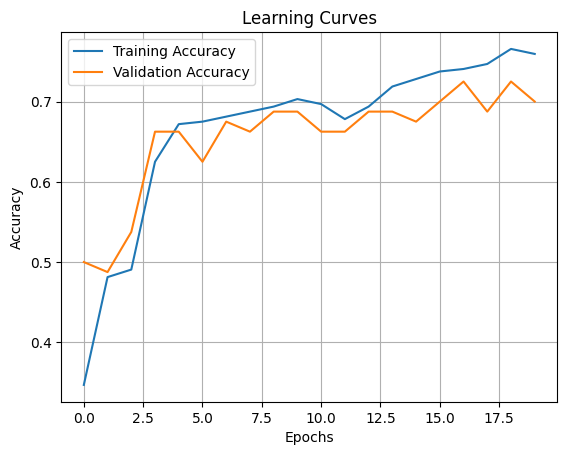

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()


My Banner ID ends with 9, so I must do experiment (c), which changes the number of nodes in the hidden layer.

Model B: hidden layer = 4 nodes

Model C: hidden layer = 16 nodes

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_B = Sequential()

model_B.add(Conv2D(8, (3,3), activation='relu', input_shape=(64, 64, 3)))
model_B.add(MaxPooling2D((2,2)))

model_B.add(Conv2D(4, (3,3), activation='relu'))
model_B.add(MaxPooling2D((2,2)))

model_B.add(Flatten())

# Modified Dense layer with 4 nodes
model_B.add(Dense(4, activation='relu'))

model_B.add(Dense(4, activation='softmax'))

model_B.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_B = model_B.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.2331 - loss: 1.4543 - val_accuracy: 0.2625 - val_loss: 1.3763
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2771 - loss: 1.3662 - val_accuracy: 0.3500 - val_loss: 1.3637
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3861 - loss: 1.3529 - val_accuracy: 0.3375 - val_loss: 1.3344
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3752 - loss: 1.3160 - val_accuracy: 0.4000 - val_loss: 1.2929
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4729 - loss: 1.2893 - val_accuracy: 0.4250 - val_loss: 1.2796
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4625 - loss: 1.2600 - val_accuracy: 0.4250 - val_loss: 1.2689
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4441 - loss: 1.2579 - val_accuracy: 0.4750 - val_loss: 1.2596
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4905 - loss: 1.2506 - val_accuracy: 0.4750 - 

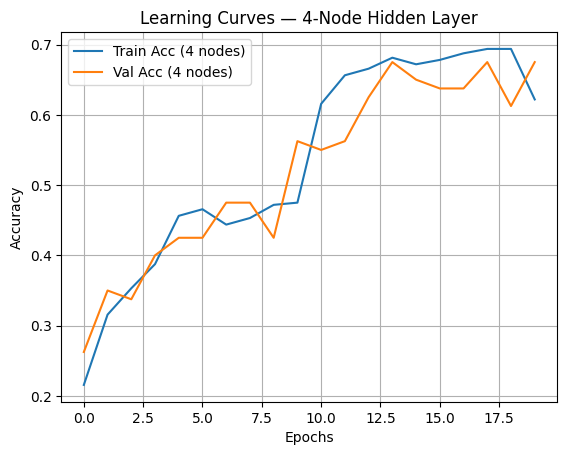

In [12]:
plt.plot(history_B.history['accuracy'], label='Train Acc (4 nodes)')
plt.plot(history_B.history['val_accuracy'], label='Val Acc (4 nodes)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curves — 4-Node Hidden Layer')
plt.legend()
plt.grid()
plt.show()

In [13]:
model_C = Sequential()

model_C.add(Conv2D(8, (3,3), activation='relu', input_shape=(64, 64, 3)))
model_C.add(MaxPooling2D((2,2)))

model_C.add(Conv2D(4, (3,3), activation='relu'))
model_C.add(MaxPooling2D((2,2)))

model_C.add(Flatten())

# Modified Dense layer with 16 nodes
model_C.add(Dense(16, activation='relu'))

model_C.add(Dense(4, activation='softmax'))

model_C.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_C = model_C.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.3231 - loss: 1.3669 - val_accuracy: 0.6500 - val_loss: 1.1758
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6628 - loss: 1.0975 - val_accuracy: 0.6125 - val_loss: 0.9260
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7169 - loss: 0.8430 - val_accuracy: 0.7000 - val_loss: 0.7710
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7419 - loss: 0.7018 - val_accuracy: 0.6875 - val_loss: 0.7437
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7328 - loss: 0.6382 - val_accuracy: 0.6875 - val_loss: 0.6945
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7467 - loss: 0.6075 - val_accuracy: 0.7125 - val_loss: 0.6944
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7928 - loss: 0.5920 - val_accuracy: 0.7500 - val_loss: 0.6909
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7995 - loss: 0.4981 - val_accuracy: 0.7125 - 

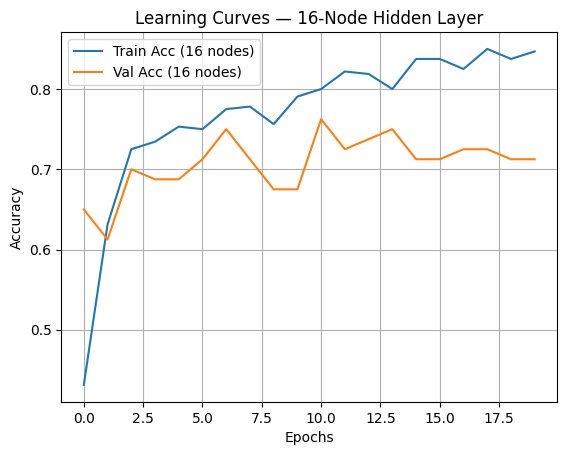

In [14]:
plt.plot(history_C.history['accuracy'], label='Train Acc (16 nodes)')
plt.plot(history_C.history['val_accuracy'], label='Val Acc (16 nodes)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curves — 16-Node Hidden Layer')
plt.legend()
plt.grid()
plt.show()

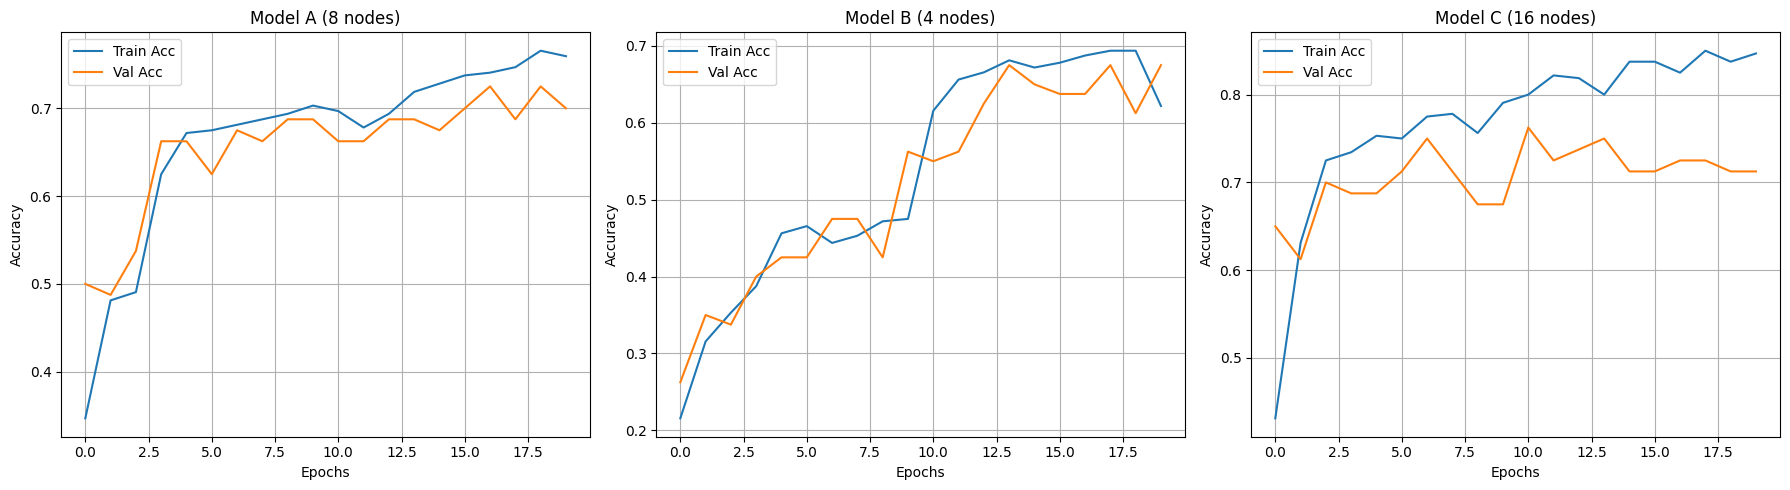

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))


# Model A (8 nodes)
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model A (8 nodes)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()


# Model B (4 nodes)
plt.subplot(1, 3, 2)
plt.plot(history_B.history['accuracy'], label='Train Acc')
plt.plot(history_B.history['val_accuracy'], label='Val Acc')
plt.title('Model B (4 nodes)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()


# Model C (16 nodes)
plt.subplot(1, 3, 3)
plt.plot(history_C.history['accuracy'], label='Train Acc')
plt.plot(history_C.history['val_accuracy'], label='Val Acc')
plt.title('Model C (16 nodes)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


The original 8-node model learned steadily and reached about 70–75% accuracy, with training and validation curves close together, so it was well-balanced. The 4-node model performed worse and stayed around 55–60% accuracy, which shows underfitting because it didn’t have enough capacity. The 16-node model reached the highest accuracy (around 75–80%) and learned faster, with only a small gap between training and validation curves, meaning slight overfitting but overall good performance.

### 3. Text Classification by fine-tuning LLM model

In [2]:
#install libraries
#load train.json, test.json, validation.json

!pip install -q transformers datasets torch scikit-learn matplotlib

from google.colab import files
uploaded = files.upload()   # choose train.json, test.json, validation.json

import pandas as pd

train_df = pd.read_json("train.json", lines=True)
test_df  = pd.read_json("test.json", lines=True)
val_df   = pd.read_json("validation.json", lines=True)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Val shape:", val_df.shape)
train_df.head()


Saving test.json to test.json
Saving train.json to train.json
Saving validation.json to validation.json
Train shape: (3000, 13)
Test shape: (1500, 13)
Val shape: (400, 13)


,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2017-En-40457,"Niggas murking in each other. In murky water, ...",True,False,True,False,False,False,True,False,False,False,False
1,2017-En-41422,@funkxwidme only #true #depression #fans will ...,False,False,False,False,False,False,False,True,True,False,False
2,2017-En-41461,.@WotzupCapeTown - thanks for sharing! Surpris...,False,False,False,False,True,True,True,False,False,True,False
3,2017-En-10518,Paul forever. Paul should have won! Paul playe...,True,False,True,False,False,False,False,False,False,False,False
4,2017-En-21589,If you think reason will prevail in this elect...,True,True,True,False,False,False,False,True,False,False,False


In [3]:
train_df.columns


Index(['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust'],
      dtype='object')

In [4]:
#Define label list and build labels vectors

import numpy as np

label_list = ['anger','anticipation','disgust','fear','joy',
              'love','optimism','pessimism','sadness','surprise','trust']

label2id = {l:i for i,l in enumerate(label_list)}
id2label = {i:l for l,i in label2id.items()}

def add_label_vector(df):
    df = df.copy()
    # convert True/False → 0/1 list
    df["labels"] = df[label_list].astype(int).values.tolist()
    return df

train_df2 = add_label_vector(train_df)
val_df2   = add_label_vector(val_df)
test_df2  = add_label_vector(test_df)


train_df2["labels"] = train_df2["labels"].apply(lambda x: np.array(x, dtype="float32"))
val_df2["labels"]   = val_df2["labels"].apply(lambda x: np.array(x, dtype="float32"))
test_df2["labels"]  = test_df2["labels"].apply(lambda x: np.array(x, dtype="float32"))


In [5]:
#Convert to HuggingFace Datasets
from datasets import Dataset

train_ds = Dataset.from_pandas(train_df2[["Tweet", "labels"]], preserve_index=False)
val_ds   = Dataset.from_pandas(val_df2[["Tweet", "labels"]], preserve_index=False)
test_ds  = Dataset.from_pandas(test_df2[["Tweet", "labels"]], preserve_index=False)


In [6]:
#okenize with BERT base (uncased)

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(batch):
    return tokenizer(
        batch["Tweet"],
        padding="max_length",
        truncation=True,
        max_length=128,
    )

train_tok = train_ds.map(tokenize_function, batched=True)
val_tok   = val_ds.map(tokenize_function, batched=True)
test_tok  = test_ds.map(tokenize_function, batched=True)


train_tok = train_tok.remove_columns(["Tweet"])
val_tok   = val_tok.remove_columns(["Tweet"])
test_tok  = test_tok.remove_columns(["Tweet"])


train_tok.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_tok.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_tok.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [7]:
#Load BERT base for multi-label classification
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(label_list),
    problem_type="multi_label_classification",
    id2label=id2label,
    label2id=label2id,
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./bert_multilabel_results",
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,

    eval_strategy="epoch",
    logging_strategy="epoch",
    save_strategy="no",

    learning_rate=2e-5,
    report_to="none",
    push_to_hub=False
)



In [16]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tok,
    eval_dataset=val_tok,
)

In [17]:
#train BERT for 5 epochs
train_output = trainer.train()

Epoch,Training Loss,Validation Loss
1,0.206500,0.358558
2,0.170400,0.359008
3,0.141100,0.370928
4,0.119800,0.383891
5,0.111000,0.384045


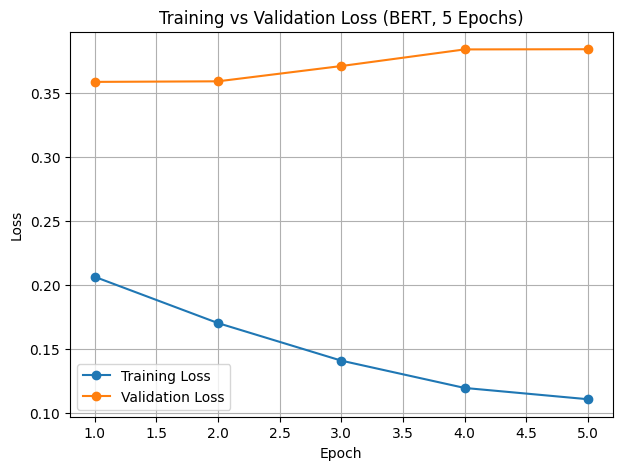

In [18]:
#Plot Training vs Validation Loss (5 Epochs)

import matplotlib.pyplot as plt

logs = trainer.state.log_history

train_losses = []
eval_losses  = []

for entry in logs:
    if "loss" in entry and "epoch" in entry:
        if len(train_losses) < int(entry["epoch"]):
            train_losses.append(entry["loss"])
    if "eval_loss" in entry:
        eval_losses.append(entry["eval_loss"])

plt.figure(figsize=(7,5))
plt.plot(range(1, len(train_losses)+1), train_losses, marker="o", label="Training Loss")
plt.plot(range(1, len(eval_losses)+1),  eval_losses,  marker="o", label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (BERT, 5 Epochs)")
plt.legend()
plt.grid()
plt.show()

In [23]:
# Test Accuracy (all labels must match)

label_cols = [
    'anger', 'anticipation', 'disgust', 'fear', 'joy',
    'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust'
]


import torch
import numpy as np

# Get raw predictions from Trainer
pred_output = trainer.predict(test_tok)

# logits → probabilities
probs = torch.sigmoid(torch.tensor(pred_output.predictions)).numpy()

# threshold at 0.5 to convert to True/False
pred_labels = (probs >= 0.5).astype(int)

# extract true labels from test_df
true_labels = test_df[label_cols].astype(int).values

# strict match: every label must be identical
strict_matches = np.all(pred_labels == true_labels, axis=1)
strict_accuracy = strict_matches.mean()

print("Test Accuracy (all labels must match):", strict_accuracy)


Test Accuracy (all labels must match): 0.25


In [22]:
#Test Accuracy ("at least one label must match")


one_match = np.any((pred_labels == true_labels) & (true_labels == 1), axis=1)

relaxed_accuracy = one_match.mean()

print("Test Accuracy (at least one label matches):", relaxed_accuracy)


Test Accuracy (at least one label matches): 0.862


# Accuracy Results:

Using the method where all emotion labels must match exactly, the test accuracy is: 25%

After changing the rule so that a prediction counts as correct if at least one of the true emotion labels matches, the test accuracy becomes: 86.2%